# Homework 7

We are given a nonlinear transformation from 

$\mathbf{x} = (x_1, x_2)$ 

to 

$\mathbf{z} = (z_0, z_1, ..., z_k) = (\phi_0(x_1, x_2), \phi_1(x_1, x_2), ..., \phi_k(x_1, x_2))$ 

with

$z_0 = \phi_0(x_1, x_2) = 1$

$z_1 = \phi_1(x_1, x_2) = x_1$

$z_2 = \phi_2(x_1, x_2) = x_2$

$z_3 = \phi_3(x_1, x_2) = x_1^2$

$z_4 = \phi_4(x_1, x_2) = x_2^2$

$z_5 = \phi_5(x_1, x_2) = x_1 x_2$

$z_6 = \phi_6(x_1, x_2) = \mid x_1 - x_2 \mid$

$z_7 = \phi_6(x_1, x_2) = \mid x_1 + x_2 \mid$

See also slide 11, lecture 13.

# Problem 1

- Split `in.dta.txt` into training (first 25 points) and validation (last 10 points) set.
- Use linear regression on the transformed training set $z$ for $k = 3,4,5,6,7$. These form five different models.
- Determine which of these five models has the lowest classification error on the validation set.

## 1.1 Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# https://stackoverflow.com/questions/9777783/suppress-scientific-notation-in-numpy-when-creating-array-from-nested-list
np.set_printoptions(suppress=True)

## 1.2 Read data

In [2]:
data_in = np.loadtxt('in.dta.txt', dtype=np.float64)
print(data_in)
print(data_in.shape)

[[-0.77947021  0.83822138  1.        ]
 [ 0.15563491  0.89537743  1.        ]
 [-0.0599077  -0.71777995  1.        ]
 [ 0.20759636  0.75893338  1.        ]
 [-0.19598312 -0.37548716 -1.        ]
 [ 0.58848947 -0.84255381  1.        ]
 [ 0.00719859 -0.5483165  -1.        ]
 [ 0.73883852 -0.60339369  1.        ]
 [ 0.70464808 -0.02042005  1.        ]
 [ 0.96992666  0.6413712  -1.        ]
 [ 0.43543099  0.74477254 -1.        ]
 [-0.84425822  0.74235423  1.        ]
 [ 0.59142471 -0.54602118  1.        ]
 [-0.06909312  0.03766    -1.        ]
 [-0.95154865 -0.73305502 -1.        ]
 [-0.12988138  0.75676096  1.        ]
 [-0.49534647 -0.56627908 -1.        ]
 [-0.90399413  0.5092215   1.        ]
 [ 0.29235128  0.16089015 -1.        ]
 [ 0.64798552 -0.77933769  1.        ]
 [ 0.37595574  0.07820309 -1.        ]
 [ 0.24588993  0.00451467 -1.        ]
 [-0.45719155  0.42390461  1.        ]
 [-0.44127876  0.70571892  1.        ]
 [ 0.50744669  0.75872586 -1.        ]
 [-0.13258381 -0.58178837

## 1.3 Split data into training and validation sets
Split the data into 25 training and 10 validation points.

In [3]:
training = data_in[:25, :]
print("training set")
print(training)
print(training.shape)
x1_train = training[ :, 0]
x2_train = training[:,1]
y_train = training[:,2]

validation = data_in[25:, :]
print("\nvalidation set")
print(validation)
print(validation.shape)
x1_val = validation[:,0]
x2_val = validation[:,1]
y_val = validation[:,2]
N_val = validation.shape[0]

training set
[[-0.77947021  0.83822138  1.        ]
 [ 0.15563491  0.89537743  1.        ]
 [-0.0599077  -0.71777995  1.        ]
 [ 0.20759636  0.75893338  1.        ]
 [-0.19598312 -0.37548716 -1.        ]
 [ 0.58848947 -0.84255381  1.        ]
 [ 0.00719859 -0.5483165  -1.        ]
 [ 0.73883852 -0.60339369  1.        ]
 [ 0.70464808 -0.02042005  1.        ]
 [ 0.96992666  0.6413712  -1.        ]
 [ 0.43543099  0.74477254 -1.        ]
 [-0.84425822  0.74235423  1.        ]
 [ 0.59142471 -0.54602118  1.        ]
 [-0.06909312  0.03766    -1.        ]
 [-0.95154865 -0.73305502 -1.        ]
 [-0.12988138  0.75676096  1.        ]
 [-0.49534647 -0.56627908 -1.        ]
 [-0.90399413  0.5092215   1.        ]
 [ 0.29235128  0.16089015 -1.        ]
 [ 0.64798552 -0.77933769  1.        ]
 [ 0.37595574  0.07820309 -1.        ]
 [ 0.24588993  0.00451467 -1.        ]
 [-0.45719155  0.42390461  1.        ]
 [-0.44127876  0.70571892  1.        ]
 [ 0.50744669  0.75872586 -1.        ]]
(25, 3)

va

## 1.4 Training

- Train on the 25 examples using linear regression.
- Perform linear regression on vectors of the form $(z_0, z_1, ..., z_k)$ for $k = 3, 4, ..., 7$.
- Use the validation set of 10 examples to select the model with the smallest classification error.

### 1.4.1 Implement linear regression

In [4]:
def get_feature_matrix_Z_k(x1, x2, k):
    '''
    - Takes vectors x1 and x2
    - builds new feature matrix Z in the transformed space,
    with up to 8 features z0, z1, ..., z7
    - parameter k determines model
    - returns feature matrix using columns z0, z1, ..., zk
    '''
    N = x1.shape[0]
    Z = np.array([np.ones(N), x1, x2,
                  x1**2, x2**2, x1*x2,
                  np.absolute(x1-x2), np.absolute(x1+x2)]).T
    
    # Using only columns 0, 1, ... , k
    return Z[:, :(k+1)]
    
#-----------------------------------------------------------
    
def linear_regression(x1, x2, y, k):
    '''
    - Takes vector x1, vector x2, vector y
    - parameter k
    - returns weight vector for linear regression
      using vectors of the form (z0, z1, ..., zk)
    '''
    
    # feature matrix Z_k
    N = x1.shape[0]
    Z_k = get_feature_matrix_Z_k(x1, x2, k)
    
    # see lecture 3, slide 17
    Z_dagger = np.dot(np.linalg.inv(np.dot(Z_k.T, Z_k)), Z_k.T)

    # Use linear regression to get weight vector
    w_tilde = np.dot(Z_dagger, y)
    
    return w_tilde

### 1.4.2 Compute weight vectors $\tilde{w}$ via linear regression

In [5]:
# perform linear regression for k = 3, ..., 7

w_tildes = 8 * [None]
for k in range(1, 8):
    w_tildes[k] = linear_regression(x1_train, x2_train, y_train, k)


print(*w_tildes, sep='\n')

None
[ 0.12744412 -0.16312456]
[ 0.11163131 -0.13365249  0.15563628]
[-0.02336115 -0.09453057  0.16020727  0.43355141]
[-0.57534995 -0.0661257   0.02774687  0.18884872  1.67686464]
[-0.57101214  0.13044545  0.12355485  0.12189717  1.41230132 -1.85424027]
[-1.74876318 -0.1359096   0.03638524 -2.1213333  -1.68326228  3.56776783
  4.59553447]
[-1.85052599 -0.13654188  0.02950979 -2.21524458 -1.88928282  3.00674018
  4.53309783  0.38474793]


### 1.4.3 Examine $k=3$

Let's look at the weight vector for $k=3$ and the feature matrix $Z_3$

In [6]:
k = 3
print("weight vector for k = 3: ", w_tildes[k])

print("\nFeature matrix Z for k = 3:")
Z_k_val = get_feature_matrix_Z_k(x1_val, x2_val, k)
print(Z_k_val)

weight vector for k = 3:  [-0.02336115 -0.09453057  0.16020727  0.43355141]

Feature matrix Z for k = 3:
[[ 1.         -0.13258381 -0.58178837  0.01757847]
 [ 1.         -0.44749067  0.19576364  0.2002479 ]
 [ 1.          0.81658199 -0.45449182  0.66680615]
 [ 1.         -0.94422408  0.88273421  0.89155911]
 [ 1.          0.46265533  0.35583605  0.21404995]
 [ 1.          0.88311642 -0.19930013  0.77989461]
 [ 1.          1.001605    0.52575476  1.00321258]
 [ 1.          0.60370095 -0.54553701  0.36445484]
 [ 1.         -0.14858757 -0.21308372  0.02207827]
 [ 1.          0.01165216  0.88923931  0.00013577]]


## 1.5 Predict the classification

The function below implements the classification of a point for a given weight vector.

In [7]:
def predict(x1_test, x2_test, w_tilde_k):
    '''
    - Takes vectors x1_test, x2_test corresponding 
    to unseen points (x1_test, x2_test)
    - Takes hypothesis / model w_tilde_k
    - Returns predictions for these points using
    the hypothesis w_tilde_k
    '''
    
    k = w_tilde_k.shape[0] - 1     # length of w is k + 1, so k = w-1
    Z_k_test = get_feature_matrix_Z_k(x1_test, x2_test, k)
    return np.sign(np.dot(Z_k_test, w_tilde_k))

### 1.5.1 Compute the classification errors

The classification errors are computed using the validation set.

In [8]:
errors_val = 8 * [None]
predictions_k_val = 8 * [None]

for k in range(1, 8):
    errors_val[k] = sum(y_val != predict(x1_val, x2_val, w_tildes[k])) / N_val
    predictions_k_val[k] = predict(x1_val, x2_val, w_tildes[k])
    
for k in range(1, 8):
    print("k=", k, "    => E_val =", errors_val[k])

k= 1     => E_val = 0.5
k= 2     => E_val = 0.7
k= 3     => E_val = 0.3
k= 4     => E_val = 0.5
k= 5     => E_val = 0.2
k= 6     => E_val = 0.0
k= 7     => E_val = 0.1


### 1.5.2 Visualize validation set

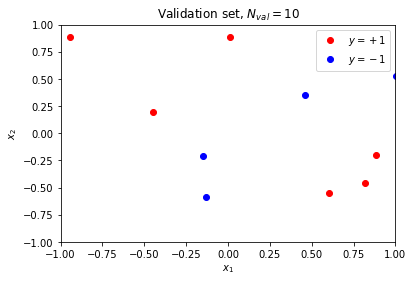

In [9]:
# plot points in validation set
plt.plot(x1_val[y_val==1], x2_val[y_val==1], 'ro', label='$y=+1$')
plt.plot(x1_val[y_val==-1], x2_val[y_val==-1], 'bo', label='$y=-1$')

title_string = "Validation set, $N_{val} = 10$"
plt.title(title_string)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

### 1.5.3 Visualize classification of validation set by different models $k$

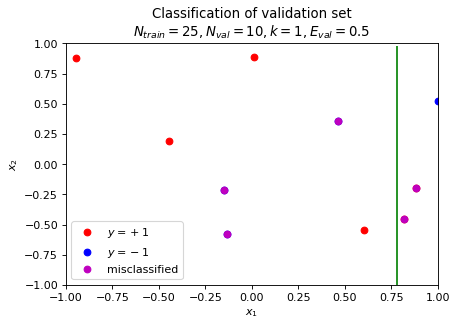

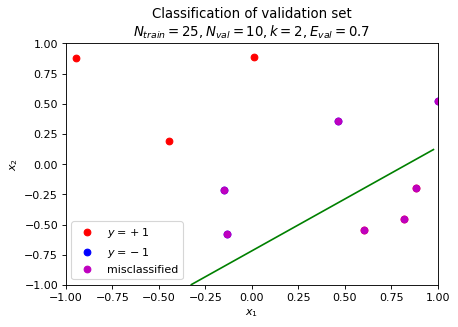

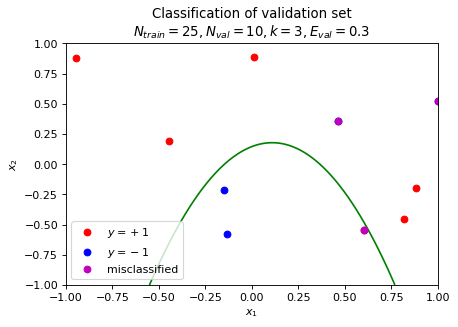

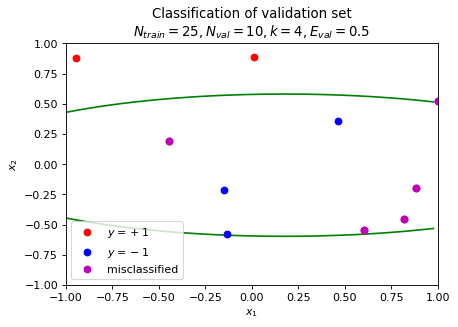

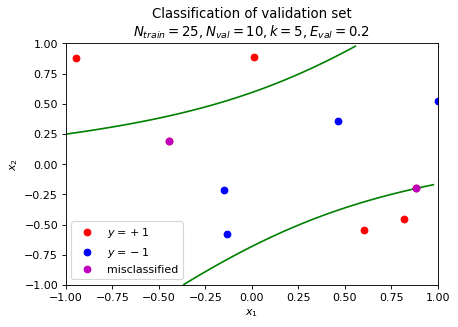

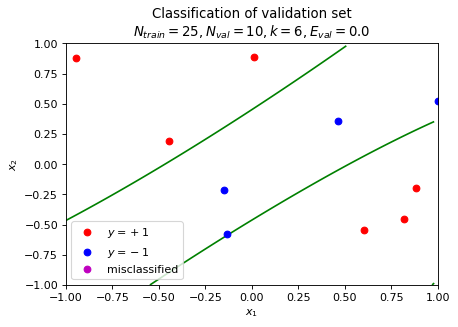

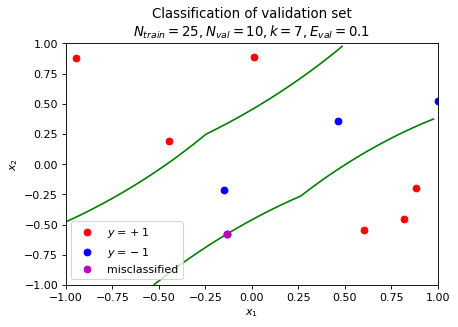

In [10]:
u = np.arange(-1.0,1.0,0.02)
X,Y= np.meshgrid(u,u)


# view validation test set
for k in range(1, 8):
    
    fig = plt.figure(k, dpi = 80)
    
    # plot points
    plt.plot(x1_val[y_val==1], x2_val[y_val==1], 'ro', label='$y=+1$')
    plt.plot(x1_val[y_val==-1], x2_val[y_val==-1], 'bo', label='$y=-1$')
    
    # plot correctly classified as blue and misclassified as red
    misclassified = (y_val != predictions_k_val[k])
    plt.plot(x1_val[misclassified], x2_val[misclassified], 'mo', label='misclassified')
    
    # print(w_tildes[k])
    w = list(w_tildes[k]) + (8-k-1) * [0]

    # plot decision boundary
    boundary = lambda x1, x2, w: w[0]*1 + w[1]*x1 + w[2]*x2 + w[3]*x1**2 + w[4]*x2**2 + w[5]*x1*x2 +w[6]* np.absolute(x1-x2) +w[7]* np.absolute(x1+x2)
    phi = boundary(X,Y, w)
    plt.contour(X,Y,phi, [0.0], colors = 'g')

    
    title_string = "Classification of validation set\n$N_{train}=25, N_{val}=10," + " k={0}, $".format(str(k))
    title_string += ("$E_{val}=$" + str(errors_val[k]))
    plt.title(title_string)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.show()

## 1.6 Result for problem 1

The error $E_{val} = 0.0$ is smallest for $k = 6$, thus the correct answer is **1[d]**.

# Problem 2

# Test set

Compute the out-of-sample classification error using `out.dta.txt` as test set


### 2.1 Read file `out.dta.txt` for test set

In [11]:
data_out = np.loadtxt('out.dta.txt', dtype=np.float64)
df_out = pd.DataFrame(data_out, columns=['x1', 'x2','y'])
print(df_out.head(5))
print(data_out.shape)

x1_test = data_out[:,0]
x2_test = data_out[:,1]
y_test = data_out[:,2]

N_test = data_out.shape[0]

         x1        x2    y
0 -0.106006 -0.081467 -1.0
1  0.177930 -0.345951 -1.0
2  0.102162  0.718258  1.0
3  0.694078  0.623397 -1.0
4  0.023541  0.727432  1.0
(250, 3)


## 2.2 Compute error on `out.dta.txt`

In [12]:
errors_test = 8 * [None]
predictions_k_test = 8 * [None]

for k in range(1, 8):
    errors_test[k] = sum(y_test != predict(x1_test, x2_test, w_tildes[k])) / N_test
    predictions_k_test[k] = predict(x1_test, x2_test, w_tildes[k])
    
for k in range(1, 8):
    print("k=", k, "    => E_out =", errors_test[k])

k= 1     => E_out = 0.488
k= 2     => E_out = 0.648
k= 3     => E_out = 0.42
k= 4     => E_out = 0.416
k= 5     => E_out = 0.188
k= 6     => E_out = 0.084
k= 7     => E_out = 0.072


### 2.3 Visualize test set

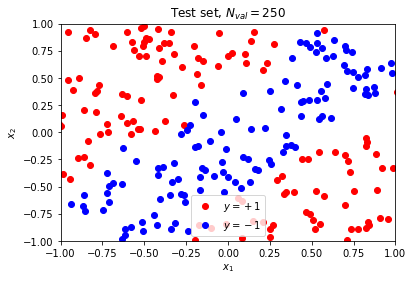

In [13]:
# plot points in test set
plt.plot(x1_test[y_test==1], x2_test[y_test==1], 'ro', label='$y=+1$')
plt.plot(x1_test[y_test==-1], x2_test[y_test==-1], 'bo', label='$y=-1$')

title_string = "Test set, $N_{val} = 250$"
plt.title(title_string)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

## 2.4 Visualize classification of test set by different models $k$

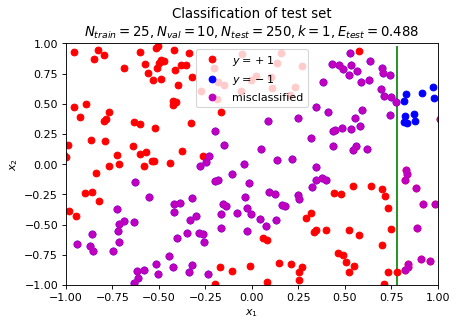

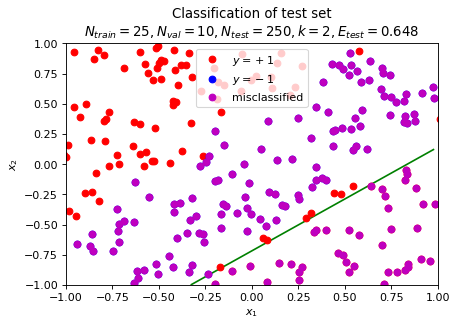

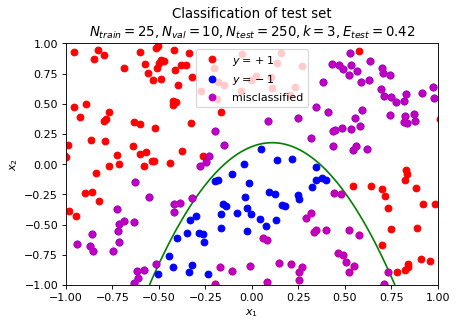

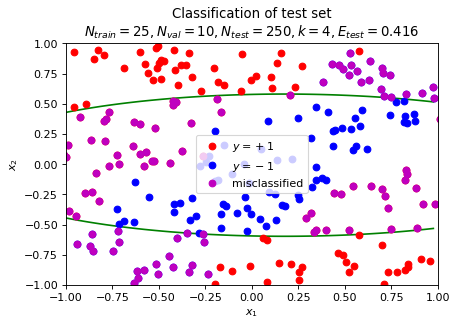

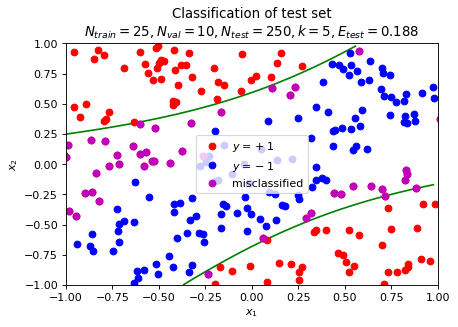

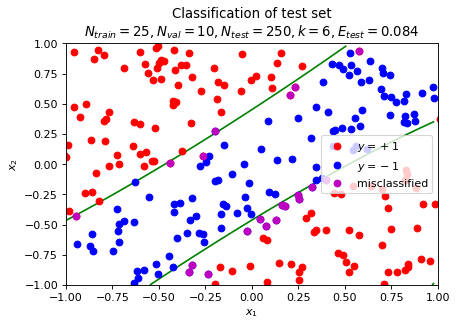

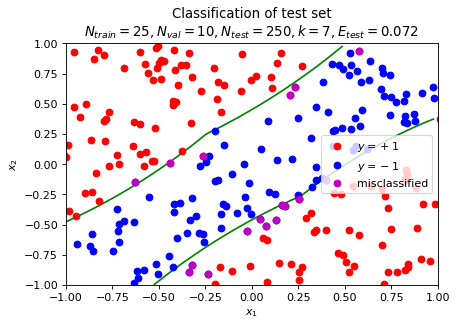

In [14]:
# use 'out.dta.txt' as test set
for k in range(1, 8):
    

    fig = plt.figure(k, dpi = 80)
    #plt.plot(x1_val[y_val==1], x2_val[y_val==1], 'ro')
    #plt.plot(x1_val[y_val==-1], x2_val[y_val==-1], 'bo')
    
    # plot points
    plt.plot(x1_test[y_test==1], x2_test[y_test==1], 'ro', label='$y=+1$')
    plt.plot(x1_test[y_test==-1], x2_test[y_test==-1], 'bo', label='$y=-1$')
    
    # plot correctly classified as blue and misclassified as red
    misclassified = (y_test != predictions_k_test[k])
    plt.plot(x1_test[misclassified], x2_test[misclassified], 'mo', label='misclassified')
    
    
    
    #print(w_tildes[k])
    w = list(w_tildes[k]) + (8-k-1) * [0]
    #print(w)

    boundary = lambda x1, x2, w: w[0]*1 + w[1]*x1 + w[2]*x2 + w[3]*x1**2 + w[4]*x2**2 + w[5]*x1*x2 +w[6]* np.absolute(x1-x2) +w[7]* np.absolute(x1+x2)
    phi = boundary(X,Y, w)
    plt.contour(X,Y,phi, [0.0], colors = 'g')

    
    title_string = "Classification of test set\n$N_{train}=25, N_{val}=10, N_{test}=250," + " k={0}, $".format(str(k))
    title_string += ("$E_{test}=$" + str(errors_test[k]))
    plt.title(title_string)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.show()

## 2.5 Result for problem 2

Using the file 'out.dta.txt' as test set the minimum out-of-sample error is $E_{test} = 0.072$ for $k=7$. Thus the correct answer is **2[e]**.

### Discussion

If we were to choose a model using the validation error, then we would choose the model for $k=6$ with the smallest validation error $E_{val} = 0.0$.

However, on the test set of size $N_{test}=250$ the model for $k=7$ achieves the smallest error $E_{test}=0.072$.